In [6]:
import os
import codecs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from dotenv import load_dotenv


load_dotenv()

True

In [7]:
path_to_data = os.environ.get("MNIST_DATAPATH")
mnist_files = os.listdir(path_to_data)
mnist_files = [x for x in mnist_files if x.endswith("ubyte")]


def convert_to_int(byte):
    integer = int(codecs.encode(byte, 'hex'), 16)
    return integer


dataset = {}
for file in mnist_files:
    print("Reading", file)
    with open(path_to_data + file, "rb") as f:
        data = f.read()
        type_of_data = convert_to_int(data[:4])
        length = convert_to_int(data[4:8])
        if type_of_data == 2051:
            category = "images"
            number_of_rows = convert_to_int(data[8:12])
            number_of_columns = convert_to_int(data[12:16])
            parsed = np.frombuffer(data, dtype=np.uint8, offset=16)
            parsed = parsed.reshape(length, number_of_rows, number_of_columns)
        if type_of_data == 2049:
            category = "labels"
            parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
            parsed = parsed.reshape(length)
        if length == 60000:
            set = "train"
        if length == 10000:
            set = "test"
        dataset[set + '_' + category] = parsed

print(dataset["train_images"][0, :, :])

Reading t10k-images-idx3-ubyte
Reading t10k-labels-idx1-ubyte
Reading train-images-idx3-ubyte
Reading train-labels-idx1-ubyte
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

In [ ]:
train_images = dataset['train_images']
train_labels = dataset['train_labels']
train_images_flattened = train_images.reshape(60000, -1)
train_images_flattened = train_images_flattened / 255

test_images = dataset['test_images']
test_labels = dataset['test_labels']
test_images_flattened = test_images.reshape(10000, -1)
test_images_flattened = test_images_flattened / 255

indices = np.random.choice(60000, size=6000, replace=False)
train_images_flattened = train_images_flattened[indices]
train_labels = train_labels[indices]

indices_test = np.random.choice(10000, size=1000, replace=False)
test_images_flattened = test_images_flattened[indices_test]
test_labels = test_labels[indices_test]

scaler =  StandardScaler()
mnist_features_train = scaler.fit_transform(train_images_flattened)
mnist_features_test = scaler.transform(test_images_flattened)

In [9]:
kmeans = KMeans(n_clusters=10, random_state=97, n_init=10)
cluster_ids = kmeans.fit_predict(mnist_features_train)

In [10]:
pca_3 = PCA(n_components=3)
mnist_features_train_pca3 = pca_3.fit_transform(mnist_features_train)
mnist_features_test_pca3 = pca_3.transform(mnist_features_test)

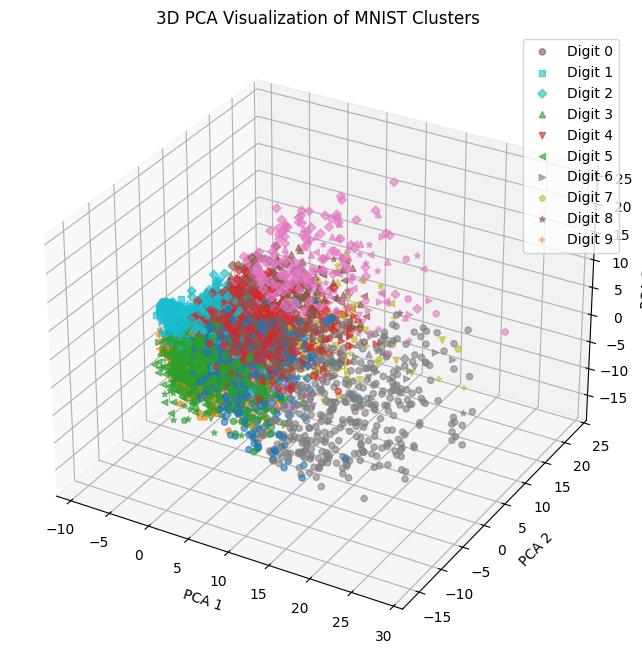

In [11]:
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', '+']
colors = sns.color_palette("tab10", 10)  # 10 distinct colors

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each sample in 3D space
for digit in range(10):
    idx = train_labels == digit  # Select points for this digit
    ax.scatter(
        mnist_features_train_pca3[idx, 0], mnist_features_train_pca3[idx, 1], mnist_features_train_pca3[idx, 2], 
        marker=markers[digit], c=[colors[cluster_ids[i]] for i in range(len(mnist_features_train_pca3)) if idx[i]],
        label=f"Digit {digit}", alpha=0.6
    )

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA Visualization of MNIST Clusters")
ax.legend()
plt.show()

1 PLOT


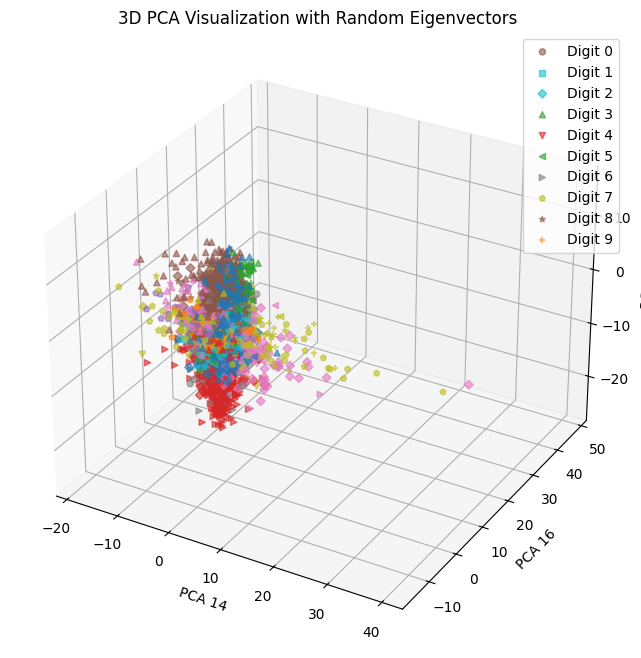

2 PLOT


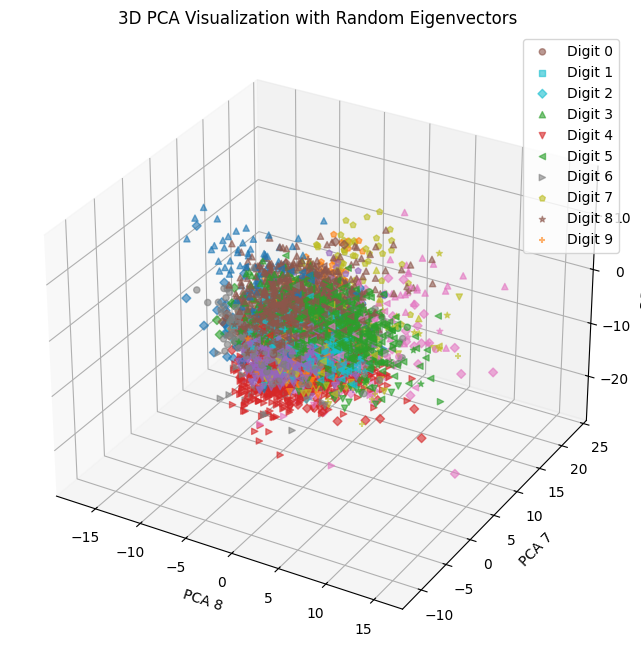

3 PLOT


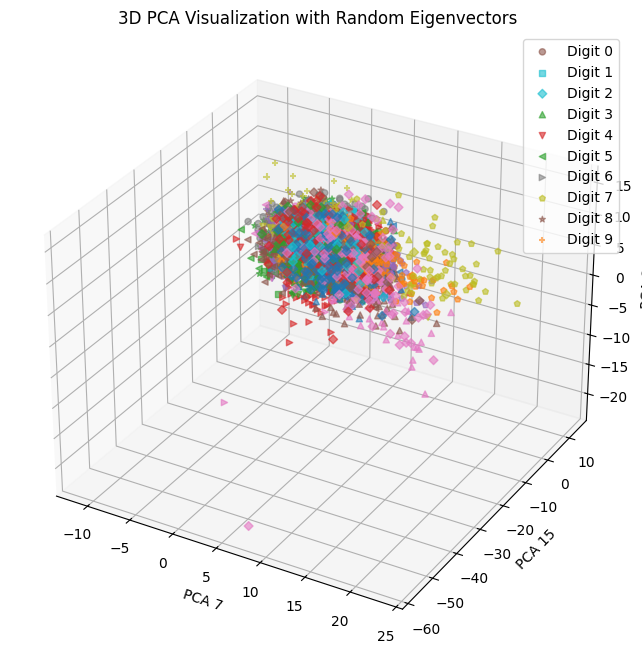

4 PLOT


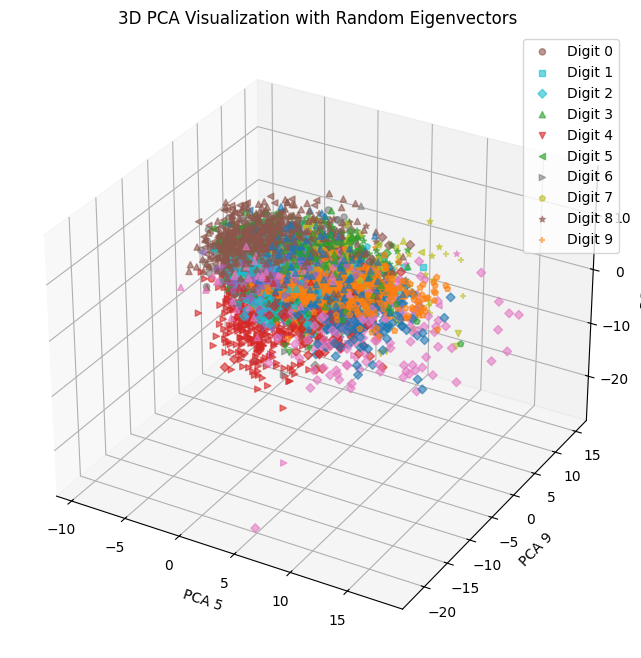

5 PLOT


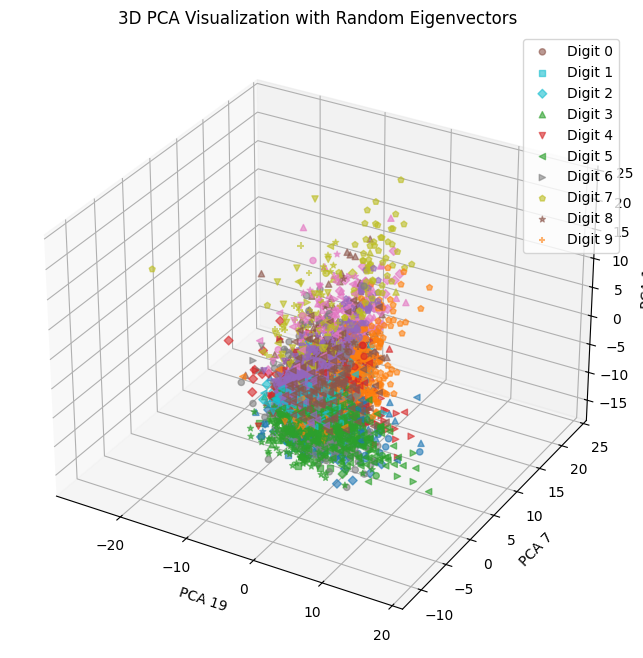

6 PLOT


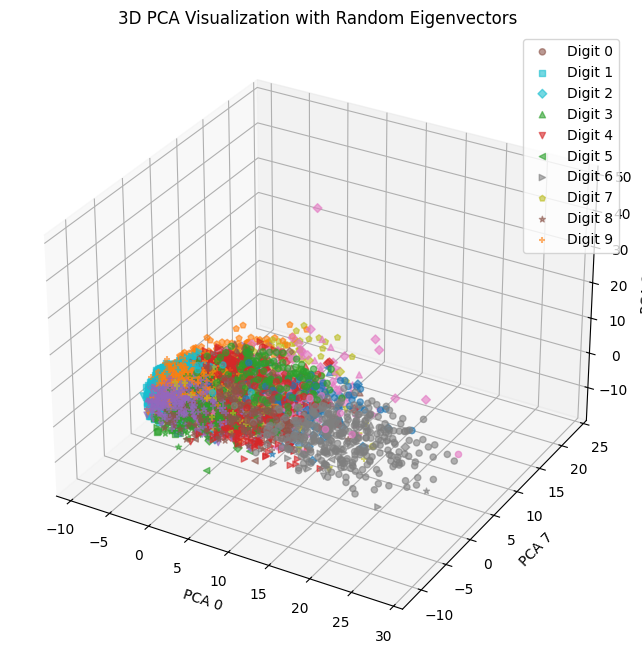

7 PLOT


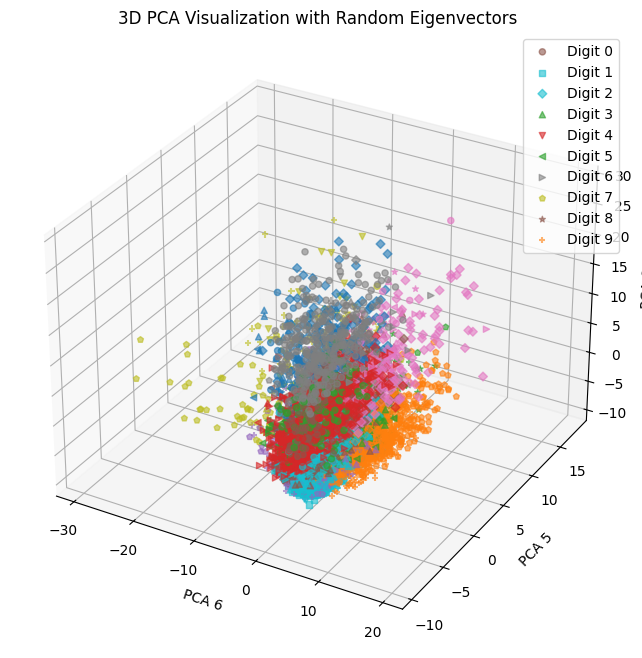

8 PLOT


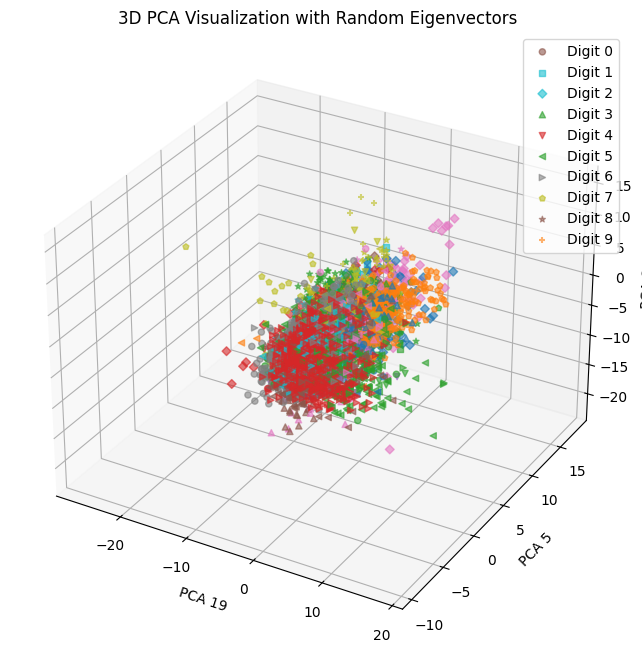

9 PLOT


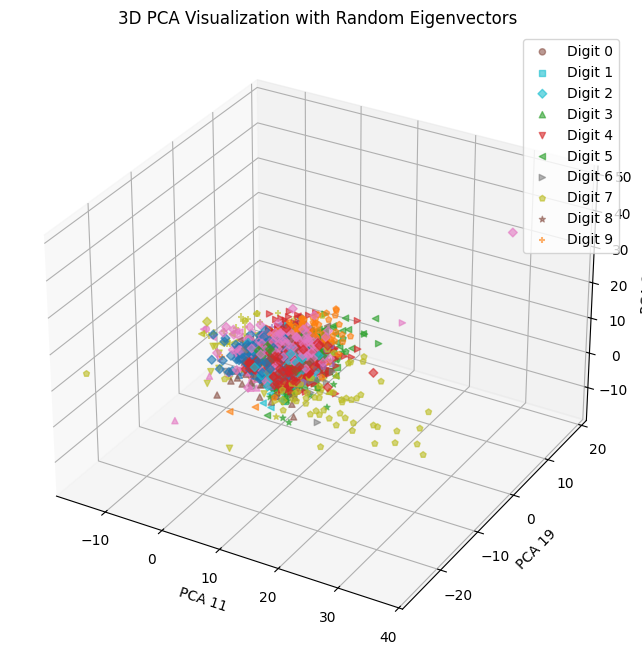

10 PLOT


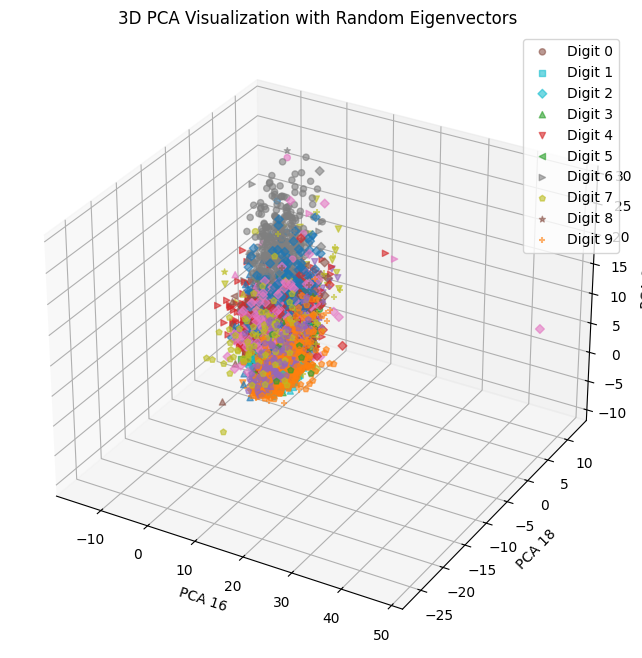

In [12]:
pca_20 = PCA(n_components=20)
mnist_features_train_pca20 = pca_20.fit_transform(mnist_features_train)

for i in range(10):
    print(f"{i + 1} PLOT")
    random_indices = random.sample(range(20), 3)

    # Project data using these random eigenvectors
    mnist_features_train_pca_random = mnist_features_train_pca20[:, random_indices]

    # 3D Plot with random eigenvectors
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for digit in range(10):
        idx = train_labels == digit
        ax.scatter(
            mnist_features_train_pca_random[idx, 0], mnist_features_train_pca_random[idx, 1], mnist_features_train_pca_random[idx, 2], 
            marker=markers[digit], c=[colors[cluster_ids[i]] for i in range(len(mnist_features_train_pca_random)) if idx[i]],
            label=f"Digit {digit}", alpha=0.6
        )

    ax.set_xlabel(f"PCA {random_indices[0]}")
    ax.set_ylabel(f"PCA {random_indices[1]}")
    ax.set_zlabel(f"PCA {random_indices[2]}")
    ax.set_title("3D PCA Visualization with Random Eigenvectors")
    ax.legend()
    plt.show()